# Demo Scripts for the wfdb-python package

Run this notebook from the base directory of the git repository to access the included demo files

## Documentation Site

http://wfdb.readthedocs.io/

In [1]:
from pandas import DataFrame as df, read_csv as rcsv
from os import getcwd

In [2]:
from scipy.io import loadmat as lm
mat = lm('data_OLD/target.mat')

* slpdbData (30seconds/sample) -> hrv_features_norm (18 features) -> fed to the model

In [3]:
mat["target"].shape

(10154, 6)

In [4]:
mat["target"]

array([[nan,  1.,  1.,  2., nan,  4.],
       [nan,  1.,  1.,  2., nan,  4.],
       [nan,  1.,  1.,  2., nan,  4.],
       ...,
       [nan,  2.,  3.,  4., nan,  6.],
       [nan,  2.,  3.,  4., nan,  6.],
       [nan,  2.,  3.,  4., nan,  6.]])

In [5]:
hrv = lm('data_OLD/hrv_features_norm.mat')

In [6]:
hrv["hrv_features_norm"]

array([[-0.07629592, -0.74722252, -0.80540639, ..., -0.1796768 ,
        -0.37644686,  0.18611609],
       [-0.00255077, -0.91659048, -0.96371511, ..., -0.37661129,
         0.6983849 , -0.48510789],
       [ 0.00476433, -0.938903  , -0.97374475, ...,  0.11651875,
         0.31176879, -0.47261944],
       ...,
       [-0.27853175, -0.91840929, -0.96716992, ..., -0.58783588,
         0.76696466, -0.52098685],
       [-0.45560957, -0.87686178, -0.97499191, ...,  0.7171304 ,
        -0.14078403, -0.79778775],
       [-0.55275029, -0.96526081, -0.98564675, ..., -0.63920706,
         0.72255814, -0.69720439]])

In [7]:
hrv["hrv_features_norm"][0]

array([-0.07629592, -0.74722252, -0.80540639, -0.80909676, -0.84615385,
       -0.86013986, -0.69378625, -0.80909676, -0.71207445, -0.43555892,
       -0.97039567,  0.38783159, -0.50124668,  0.50124668, -0.87453916,
       -0.1796768 , -0.37644686,  0.18611609])

In [8]:
mat["target"].shape

(10154, 6)

In [9]:
dt = lm('data_OLD/SlpdbData.mat')["SlpdbData"]

In [76]:
dt

array([[(array(['slpdb/slp01a'], dtype='<U12'), array(['0:00.000'], dtype='<U8'), array([[0.076, 0.86 , 0.892, 0.92 , 0.896, 0.904, 0.892, 0.884, 0.908,
                0.884, 0.86 , 0.864, 0.852, 0.868, 0.908, 0.948, 0.98 , 0.968,
                0.956, 0.988, 0.996, 0.984, 0.956, 0.924, 0.936, 0.94 , 0.948,
                0.944, 0.904, 0.888, 0.896, 0.912, 0.904, 0.872]]), array(['4'], dtype='<U1'), array(['44'], dtype='<U2'), array(['M'], dtype='<U1'), array(['89'], dtype='<U2'))],
       [(array(['slpdb/slp01a'], dtype='<U12'), array(['0:30.000'], dtype='<U8'), array([[0.836, 0.824, 0.836, 0.864, 0.9  , 0.924, 0.92 , 0.992, 1.016,
                1.004, 0.996, 0.948, 0.936, 0.924, 0.92 , 0.92 , 0.888, 0.88 ,
                0.892, 0.928, 0.968, 0.96 , 0.904, 0.88 , 0.852, 0.856, 0.864,
                0.872, 0.888, 0.952, 1.   , 0.992, 0.988]]), array(['4'], dtype='<U1'), array(['44'], dtype='<U2'), array(['M'], dtype='<U1'), array(['89'], dtype='<U2'))],
       [(array(['slpdb/sl

In [10]:
def slpdb_mat_to_df(dataset, *args, **kwargs) -> None:
    filename = []
    time = []
    rr_interval = []
    annotation = []
    age = []
    gender = []
    weight = []

    for data in dataset:
        filename.append(data[0]["filename"][0])
        time.append(data[0]["time"][0])
        rr_interval.append(data[0]["rr"][0])
        annotation.append(data[0]["annotation"][0])
        age.append(data[0]["age"][0])
        gender.append(data[0]["gender"][0])
        weight.append(data[0]["weight"][0])

    df({"filename" : filename, "time" : time, "rr_interval" : rr_interval, "annot" : annotation, "age" : age, "gender" : gender, "weight" : weight}) \
        .to_csv("SlpDbData.csv", index=False)

In [11]:
data = rcsv("data_OLD/SlpDbData.csv")
data

,filename,time,rr_interval,annot,age,gender,weight
0,slpdb/slp01a,0:00.000,[0.076 0.86 0.892 0.92 0.896 0.904 0.892 0.8...,4,44,M,89
1,slpdb/slp01a,0:30.000,[0.836 0.824 0.836 0.864 0.9 0.924 0.92 0.9...,4,44,M,89
2,slpdb/slp01a,1:00.000,[0.964 0.936 0.964 0.956 0.952 0.924 0.904 0.9...,4,44,M,89
3,slpdb/slp01a,1:30.000,[0.9 0.844 0.848 0.852 0.876 0.92 0.94 0.9...,4,44,M,89
4,slpdb/slp01a,2:00.000,[1.04 1.036 1.004 0.984 0.972 0.968 0.952 0.9...,4,44,M,89
...,...,...,...,...,...,...,...
10149,slpdb/slp67x,1:14:30.000,[0.856 0.848 0.9 0.904 0.872 0.868 0.876 0.8...,W,x,M,x
10150,slpdb/slp67x,1:15:00.000,[0.8 0.808 0.776 0.776 0.828 0.916 0.92 0.8...,W,x,M,x
10151,slpdb/slp67x,1:15:30.000,[0.884 0.848 0.848 0.856 0.848 0.856 0.84 0.8...,W,x,M,x
10152,slpdb/slp67x,1:16:00.000,[0.704 0.696 0.688 0.676 0.668 0.684 0.704 0.7...,W,x,M,x


In [12]:
set(data.annot) # classes

{'1', '2', '3', '4', 'R', 'W'}

In [13]:
dt[0][0]["filename"][0]

'slpdb/slp01a'

In [14]:
dt[0].dtype

dtype([('filename', 'O'), ('time', 'O'), ('rr', 'O'), ('annotation', 'O'), ('age', 'O'), ('gender', 'O'), ('weight', 'O')])

In [15]:
dt[238]

array([(array(['slpdb/slp01a'], dtype='<U12'), array(['1:59:30.000'], dtype='<U11'), array([[0.952, 0.976, 0.972, 0.976, 0.952, 0.924, 0.928, 0.936, 0.96 ,
               0.972, 1.004, 1.024, 1.048, 1.076, 1.08 , 1.068, 1.036, 1.04 ,
               1.036, 1.032, 1.016, 0.98 , 0.996, 0.996, 1.012, 1.012, 1.008,
               0.956, 0.964]]), array(['2'], dtype='<U1'), array(['44'], dtype='<U2'), array(['M'], dtype='<U1'), array(['89'], dtype='<U2'))              ],
      dtype=[('filename', 'O'), ('time', 'O'), ('rr', 'O'), ('annotation', 'O'), ('age', 'O'), ('gender', 'O'), ('weight', 'O')])

In [16]:
dt[1]

array([(array(['slpdb/slp01a'], dtype='<U12'), array(['0:30.000'], dtype='<U8'), array([[0.836, 0.824, 0.836, 0.864, 0.9  , 0.924, 0.92 , 0.992, 1.016,
               1.004, 0.996, 0.948, 0.936, 0.924, 0.92 , 0.92 , 0.888, 0.88 ,
               0.892, 0.928, 0.968, 0.96 , 0.904, 0.88 , 0.852, 0.856, 0.864,
               0.872, 0.888, 0.952, 1.   , 0.992, 0.988]]), array(['4'], dtype='<U1'), array(['44'], dtype='<U2'), array(['M'], dtype='<U1'), array(['89'], dtype='<U2'))],
      dtype=[('filename', 'O'), ('time', 'O'), ('rr', 'O'), ('annotation', 'O'), ('age', 'O'), ('gender', 'O'), ('weight', 'O')])

In [17]:
dt[1834]

array([(array(['slpdb/slp03'], dtype='<U11'), array(['5:16:00.000'], dtype='<U11'), array([[0.948, 0.932, 0.888, 0.888, 0.932, 0.936, 0.936, 0.884, 0.876,
               0.868, 0.904, 0.952, 0.896, 0.88 , 0.936, 0.956, 0.972, 0.96 ,
               0.924, 0.956, 0.984, 0.984, 0.956, 0.92 , 0.928, 0.92 , 0.896,
               0.856, 0.812, 0.832, 0.832, 0.848, 0.828]]), array(['2'], dtype='<U1'), array(['51'], dtype='<U2'), array(['M'], dtype='<U1'), array(['152'], dtype='<U3'))],
      dtype=[('filename', 'O'), ('time', 'O'), ('rr', 'O'), ('annotation', 'O'), ('age', 'O'), ('gender', 'O'), ('weight', 'O')])

In [18]:
from wf_preproc import show_ann_label, get_db, extract_ann

In [19]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import posixpath
import wfdb

* "mitdb" = **MIT-BIH Arrhythmia Database**
* "slpdb" = **MIT-BIH Polysomnographic Database**
* "sleep-edfx" = **MIT-BIH Sleep-EDF Expanded Database** (currently not supported to be read with wfdb.rdrecord)
* "vfdb" = **MIT-BIH Malignant Ventricular Ectopy Database**
* "nsrdb" = **MIT-BIH Normal Sinus Rhythm Database**

In [20]:
dataset = get_db(key="slpdb")
db, records = dataset["db"], dataset["records"]

DB_NAME: MIT-BIH Polysomnographic Database
TOTAL_RECORDS: 18


In [21]:
records

['slp01a',
 'slp01b',
 'slp02a',
 'slp02b',
 'slp03',
 'slp04',
 'slp14',
 'slp16',
 'slp32',
 'slp37',
 'slp41',
 'slp45',
 'slp48',
 'slp59',
 'slp60',
 'slp61',
 'slp66',
 'slp67x']

In [22]:
# extract_ann(list_of_records=records, db=db, ext="atr")

In [23]:
# rcsv("data/vfdb-rdann.csv")

In [24]:
slpdb_ann = rcsv("data/slpdb-rdann.csv")
slpdb_ann

,r_name,annot_idx,annot_aux
0,slp01a,1,4
1,slp01a,7500,4
2,slp01a,15000,4
3,slp01a,22500,4
4,slp01a,30000,4
...,...,...,...
10192,slp67x,1117500,W
10193,slp67x,1125000,W
10194,slp67x,1132500,W
10195,slp67x,1140000,W


In [25]:
# extract_rdheader(list_of_records=records, db=db)

In [26]:
slpdb_hea = rcsv("data/slpdb-rdheader.csv")
slpdb_hea

,r_name,sig_len,sampling_freq,created_at
0,slp01a,1800000,250,1989-01-19 23:07:00
1,slp01b,2700000,250,1989-01-20 02:14:00
2,slp02a,2700000,250,1989-02-01 00:49:00
3,slp02b,2025000,250,1989-02-01 03:59:30
4,slp03,5400000,250,1989-02-09 23:12:00
5,slp04,5400000,250,1989-02-26 00:05:30
6,slp14,5400000,250,1989-03-30 23:48:00
7,slp16,5400000,250,1989-04-06 23:48:00
8,slp32,4800000,250,1989-07-20 01:05:30
9,slp37,5250000,250,1989-08-10 00:08:30


In [27]:
record = wfdb.rdrecord(records[4], channels=[0, 1], pn_dir=db)

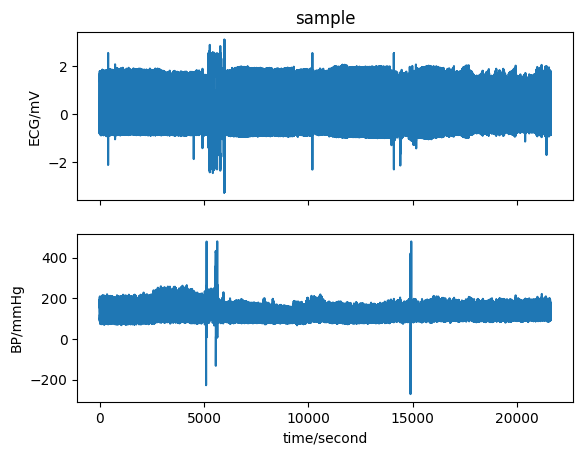

{'record_name': 'slp03',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': 0.033333333,
 'base_counter': 160.0,
 'sig_len': 5400000,
 'base_time': datetime.time(23, 12),
 'base_date': datetime.date(1989, 2, 9),
 'comments': ['51 M 152 17-02-89'],
 'sig_name': ['ECG', 'BP'],
 'p_signal': array([[ 2.80000000e-02,  9.86885893e+01],
        [ 2.60000000e-02,  9.86885893e+01],
        [-6.00000000e-03,  9.82295726e+01],
        ...,
        [ 3.20000000e-02,  1.61573876e+02],
        [ 2.00000000e-02,  1.63868960e+02],
        [ 4.00000000e-03,  1.65246010e+02]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['slp03.dat', 'slp03.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [-500.0, 4.35714],
 'baseline': [0, -456],
 'units': ['mV', 'mmHg'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-14, -26],
 'checksum': [35685, 59283],
 'block_size': [0, 0]}

In [28]:
wfdb.plot_wfdb(record=record, title="sample")
record.__dict__

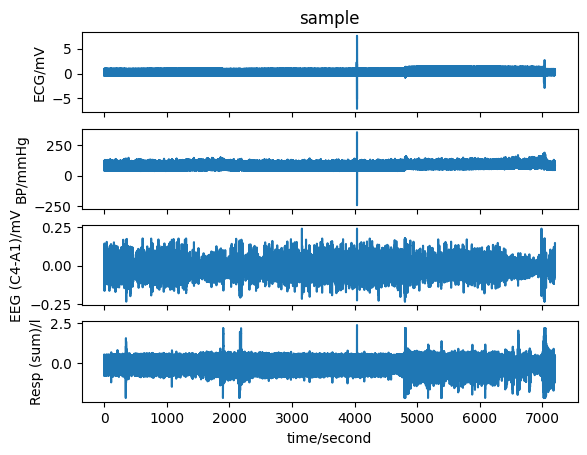

{'record_name': 'slp01a',
 'n_sig': 4,
 'fs': 250,
 'counter_freq': 0.033333333,
 'base_counter': 94.0,
 'sig_len': 1800000,
 'base_time': datetime.time(23, 7),
 'base_date': datetime.date(1989, 1, 19),
 'comments': ['44 M 89 32-01-89'],
 'sig_name': ['ECG', 'BP', 'EEG (C4-A1)', 'Resp (sum)'],
 'p_signal': array([[ 8.50000000e-02,  4.79302103e+01, -3.91912908e-02,
         -2.60869565e-01],
        [ 8.00000000e-02,  4.77209080e+01, -3.88802488e-02,
         -2.66666667e-01],
        [ 1.25000000e-01,  4.79302103e+01, -3.85692068e-02,
         -2.60869565e-01],
        ...,
        [ 2.30000000e-01,  7.86976378e+01,  1.47278383e-01,
          3.82608696e-01],
        [ 2.35000000e-01,  8.20464735e+01,  1.46811820e-01,
          3.81159420e-01],
        [ 2.25000000e-01,  8.56046113e+01,  1.42612753e-01,
          3.76811594e-01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['slp01a.dat', 'slp01a.dat', 'slp01a.dat', 'slp01a.dat'],
 'fmt': ['212', '212', 

In [29]:
record = wfdb.rdrecord(records[0], channels=[0, 1, 2, 3] if db=="slpdb" else [0, 1], pn_dir=db)
    # channels == index of sig_name, for sleepdb, 0 : ECG/mV, 1: BloodPressure/mmHg, 2: EEG (C4-A1)/mV, 3: Resp (sum)/L
    # channels == index of sig_name, for mitdb, 0 : MLII/mV, 1: V5/mV
wfdb.plot_wfdb(record=record, title="sample")
record.__dict__

In [30]:
r_signals = record.p_signal.T

In [31]:
r_signals[0]

array([0.085, 0.08 , 0.125, ..., 0.23 , 0.235, 0.225])

In [32]:
r_signals[1]

array([47.93021027, 47.72090804, 47.93021027, ..., 78.69763782,
       82.04647347, 85.60461135])

In [33]:
record.p_signal.shape

(1800000, 4)

* .st --> sleep stages and apnea annotations: [link](https://archive.physionet.org/physiobank/database/slpdb/slpdb.shtml) (note: st stands for sleep telemetry)
* .ecg --> heart beat annotations: [link](https://archive.physionet.org/physiobank/annotations.shtml)
* .atr
* HRV analysis pkg Python [link](https://github.com/Aura-healthcare/hrv-analysis)

In [34]:
x = records[0]

In [35]:
annot = wfdb.rdann(record_name=x, sampto=1000, extension="ecg" if db=="slpdb" else "atr", pn_dir=db)

In [36]:
for x in ["slp16", "slp59", "slp61"]:
    annot = wfdb.rdann(record_name=x, sampto=1000000, extension="st" if db=="slpdb" else "atr", pn_dir=db)
    print(x, annot.__dict__["sample"], annot.__dict__["aux_note"])

slp16 [195000 202500 210000 217500 225000 232500 240000 247500 255000 262500
 270000 277500 285000 292500 300000 307500 315000 322500 330000 337500
 345000 352500 360000 367500 375000 382500 390000 397500 405000 412500
 420000 427500 435000 442500 450000 457500 465000 472500 480000 487500
 495000 502500 510000 517500 525000 532500 540000 547500 555000 562500
 570000 577500 585000 592500 600000 607500 615000 622500 630000 637500
 645000 652500 660000 667500 675000 682500 690000 697500 705000 712500
 720000 727500 735000 742500 750000 757500 765000 772500 780000 787500
 795000 802500 810000 817500 825000 832500 840000 847500 855000 862500
 870000 877500 885000 892500 900000 907500 915000 922500 930000 937500
 945000 952500 960000 967500 975000 982500 990000 997500] ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1 HA', 'W HA X', '1', '1 HA HA', 'W', '1 HA HA', 'W X CAA', '1 CAA', 'W X CAA', '1 CAA', '1 X', '1 X', '1 X', '1 X', '1 X', 'W', 'W', '1 X', '1 X X', '1 X

In [37]:
# for i in records:
#     annot = wfdb.rdann(record_name=i, sampto=1800000, extension="st" if db=="slpdb" else "atr", pn_dir=db)
#     print(i, annot.__dict__["aux_note"])

In [38]:
# wfdb.rdann(records[0], extension="ecg" if db=="sleepdb" else "atr", pn_dir=db).__dict__

In [39]:
# for i in records:
#     record = wfdb.rdrecord(i, sampto=100000, pn_dir=db)
#     annotation = wfdb.rdann(record_name=i, extension="ecg" if db=="sleepdb" else "atr", sampto=100000, pn_dir=db)
#     print(set(annotation.__dict__["symbol"]))

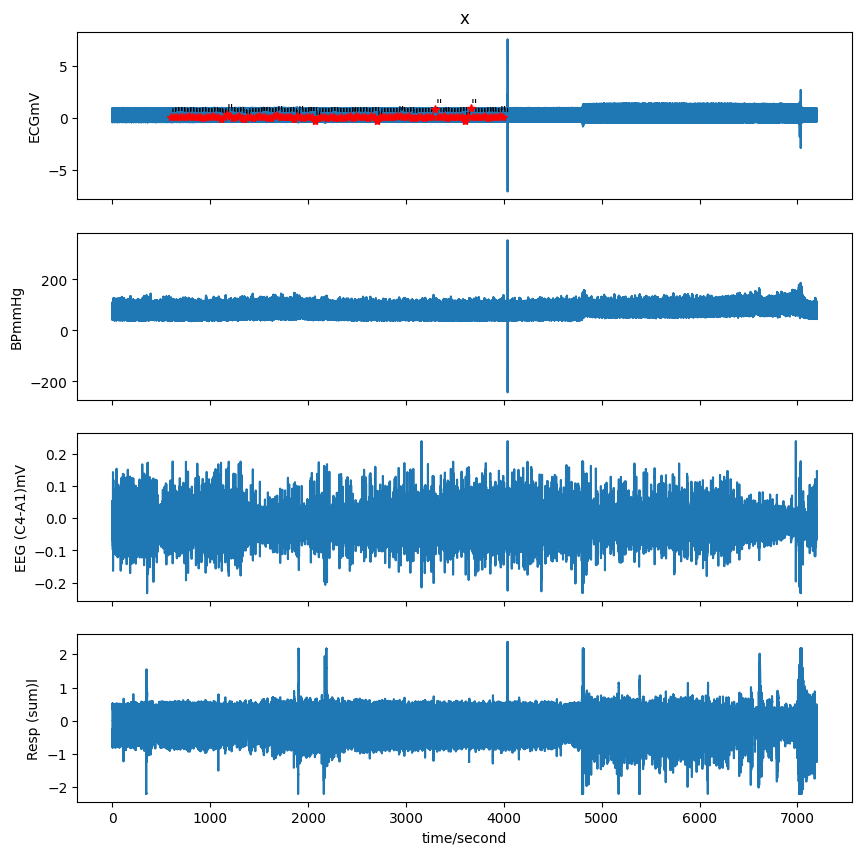

In [40]:
# sampto from RECORD and ANNOTATION must be the same
wfdb.plot_wfdb(record=record, annotation=annot, title='x', plot_sym=True, figsize=(10, 10))

### Processing

In [41]:
import wfdb.processing

* all intervals

In [90]:
dt[3][0]

(array(['slpdb/slp01a'], dtype='<U12'), array(['1:30.000'], dtype='<U8'), array([[0.9  , 0.844, 0.848, 0.852, 0.876, 0.92 , 0.94 , 0.992, 1.028,
        1.056, 1.052, 1.012, 0.984, 0.992, 1.   , 1.   , 0.968, 0.928,
        0.9  , 0.9  , 0.872, 0.848, 0.844, 0.848, 0.876, 0.932, 0.936,
        0.952, 0.996, 0.992, 0.976, 1.024]]), array(['4'], dtype='<U1'), array(['44'], dtype='<U2'), array(['M'], dtype='<U1'), array(['89'], dtype='<U2'))

In [81]:
rr_interval = wfdb.processing.ann2rr(records[0], pn_dir=db, extension="ecg", as_array=True, format='s') # 's' = seconds
rr_interval

array([0.076, 0.86 , 0.892, ..., 1.008, 0.956, 0.964])

In [88]:
rr_interval[:60]

array([0.076, 0.86 , 0.892, 0.92 , 0.896, 0.904, 0.892, 0.884, 0.908,
       0.884, 0.86 , 0.864, 0.852, 0.868, 0.908, 0.948, 0.98 , 0.968,
       0.956, 0.988, 0.996, 0.984, 0.956, 0.924, 0.936, 0.94 , 0.948,
       0.944, 0.904, 0.888, 0.896, 0.912, 0.904, 0.872, 0.836, 0.824,
       0.836, 0.864, 0.9  , 0.924, 0.92 , 0.992, 1.016, 1.004, 0.996,
       0.948, 0.936, 0.924, 0.92 , 0.92 , 0.888, 0.88 , 0.892, 0.928,
       0.968, 0.96 , 0.904, 0.88 , 0.852, 0.856])

In [43]:
list(60 / rr_interval)

[789.4736842105264,
 69.76744186046511,
 67.26457399103138,
 65.21739130434783,
 66.96428571428571,
 66.3716814159292,
 67.26457399103138,
 67.87330316742081,
 66.07929515418502,
 67.87330316742081,
 69.76744186046511,
 69.44444444444444,
 70.4225352112676,
 69.12442396313364,
 66.07929515418502,
 63.29113924050633,
 61.224489795918366,
 61.98347107438017,
 62.761506276150634,
 60.72874493927126,
 60.24096385542169,
 60.97560975609756,
 62.761506276150634,
 64.93506493506493,
 64.1025641025641,
 63.829787234042556,
 63.29113924050633,
 63.55932203389831,
 66.3716814159292,
 67.56756756756756,
 66.96428571428571,
 65.78947368421052,
 66.3716814159292,
 68.80733944954129,
 71.77033492822967,
 72.81553398058253,
 71.77033492822967,
 69.44444444444444,
 66.66666666666667,
 64.93506493506493,
 65.21739130434783,
 60.483870967741936,
 59.05511811023622,
 59.7609561752988,
 60.24096385542169,
 63.29113924050633,
 64.1025641025641,
 64.93506493506493,
 65.21739130434783,
 65.21739130434783,
 6

In [44]:
rr_interval.shape

(7806,)

In [45]:
db

'slpdb'

In [47]:
rr_interval = wfdb.processing.ann2rr(records[4], pn_dir=db, extension="ecg", as_array=True, format='s')

In [48]:
rr_interval

array([0.096, 0.824, 0.836, ..., 0.86 , 0.848, 0.86 ])

* rr interval per annotation (30 seconds)

In [49]:
slpdb_hea

,r_name,sig_len,sampling_freq,created_at
0,slp01a,1800000,250,1989-01-19 23:07:00
1,slp01b,2700000,250,1989-01-20 02:14:00
2,slp02a,2700000,250,1989-02-01 00:49:00
3,slp02b,2025000,250,1989-02-01 03:59:30
4,slp03,5400000,250,1989-02-09 23:12:00
5,slp04,5400000,250,1989-02-26 00:05:30
6,slp14,5400000,250,1989-03-30 23:48:00
7,slp16,5400000,250,1989-04-06 23:48:00
8,slp32,4800000,250,1989-07-20 01:05:30
9,slp37,5250000,250,1989-08-10 00:08:30


In [50]:
ann = wfdb.rdann(record_name="slp02a", sampfrom=1, sampto=7500, extension="ecg", pn_dir="slpdb")

In [51]:
ann.sample

array([  29,  192,  342,  495,  648,  801,  955, 1107, 1275, 1442, 1604,
       1767, 1941, 2101, 2256, 2428, 2588, 2745, 2897, 3060, 3220, 3375,
       3526, 3689, 3849, 4004, 4154, 4315, 4483, 4644, 4800, 4960, 5128,
       5289, 5445, 5614, 5803, 5966, 6124, 6281, 6452, 6608, 6759, 6905,
       7057, 7225, 7386], dtype=int64)

In [52]:
slpdb_hea_01a = slpdb_hea[slpdb_hea.r_name=="slp01a"]
slpdb_hea_01a

,r_name,sig_len,sampling_freq,created_at
0,slp01a,1800000,250,1989-01-19 23:07:00


In [53]:
slpdb_ann_01a = slpdb_ann[slpdb_ann.r_name=="slp01a"]
slpdb_ann_01a.insert(len(slpdb_ann_01a.columns), "annot_idx_t", slpdb_ann_01a.annot_idx.shift(periods=-1, fill_value=0).astype(int))

In [54]:
slpdb_ann_01a

,r_name,annot_idx,annot_aux,annot_idx_t
0,slp01a,1,4,7500
1,slp01a,7500,4,15000
2,slp01a,15000,4,22500
3,slp01a,22500,4,30000
4,slp01a,30000,4,37500
...,...,...,...,...
235,slp01a,1762500,W,1770000
236,slp01a,1770000,W,1777500
237,slp01a,1777500,W,1785000
238,slp01a,1785000,2,1792500


In [96]:
ann.sample

array([165008, 165251, 165492, 165724, 165953, 166185, 166419, 166650,
       166879, 167103, 167317, 167532, 167755, 167983, 168221, 168458,
       168696, 168939, 169183, 169427, 169664, 169898, 170133, 170375,
       170618, 170858, 171091, 171320, 171551, 171780, 172011, 172238,
       172462, 172682], dtype=int64)

In [94]:
for _, i in slpdb_ann_01a.iloc[:-1].iterrows():
    if _ >= 20:
        FS = slpdb_hea_01a.squeeze(axis=0).sampling_freq
        from_idx = i.annot_idx
        to_idx = i.annot_idx_t

        ann = wfdb.rdann(record_name="slp01a", sampfrom=from_idx, sampto=to_idx+FS, extension="ecg", pn_dir="slpdb")
        rr_interval = wfdb.processing.calc_rr(ann.sample, fs=FS)
        rr_interval = np.insert(rr_interval, 0, ann.sample[0]) if from_idx == 1 else rr_interval
            # np.insert() is used to add the first annotation sample (i.e., ann.sample[0]), only when annot_idx = 1
        rr_interval = rr_interval # / ann.fs # normalize
        print("f={}, t={} {}".format(from_idx, to_idx, rr_interval))

        if _ == 25:
            break

[  19  234  457  687  911 1137 1360 1581 1808 2029 2244 2460 2673 2890
 3117 3354 3599 3841 4080 4327 4576 4822 5061 5292 5526 5761 5998 6234
 6460 6682 6906 7134 7360 7578]
f=1, t=7500 [ 19 215 223 230 224 226 223 221 227 221 215 216 213 217 227 237 245 242
 239 247 249 246 239 231 234 235 237 236 226 222 224 228 226 218]
[ 7578  7787  7993  8202  8418  8643  8874  9104  9352  9606  9857 10106
 10343 10577 10808 11038 11268 11490 11710 11933 12165 12407 12647 12873
 13093 13306 13520 13736 13954 14176 14414 14664 14912 15159]
f=7500, t=15000 [209 206 209 216 225 231 230 248 254 251 249 237 234 231 230 230 222 220
 223 232 242 240 226 220 213 214 216 218 222 238 250 248 247]
[15159 15400 15634 15875 16114 16352 16583 16809 17038 17266 17497 17728
 17946 18159 18368 18575 18787 19007 19230 19455 19691 19934 20178 20416
 20654 20898 21143 21387 21619 21845 22071 22301 22532]
f=15000, t=22500 [241 234 241 239 238 231 226 229 228 231 231 218 213 209 207 212 220 223
 225 236 243 244 238 238

KeyboardInterrupt: 

In [56]:
wfdb.processing.calc_mean_hr(rr=rr_interval, rr_units="seconds")

0.2577873254564984

In [57]:
rr_interval

array([240, 245, 238, 230, 232, 231, 232, 221, 226, 236, 239, 244, 246,
       242, 234, 237, 236, 238, 235, 228, 224, 227, 230, 228, 223, 217,
       215, 217, 228, 237, 246, 246], dtype=int64)

* Normalize data

In [58]:
from sklearn.preprocessing import normalize as norm, MinMaxScaler as mms

In [59]:
norm(rr_interval.reshape(-1, 1), axis=0)

array([[0.18215785],
       [0.1859528 ],
       [0.18063987],
       [0.17456794],
       [0.17608592],
       [0.17532693],
       [0.17608592],
       [0.16773702],
       [0.17153197],
       [0.17912188],
       [0.18139886],
       [0.18519381],
       [0.1867118 ],
       [0.18367583],
       [0.1776039 ],
       [0.17988088],
       [0.17912188],
       [0.18063987],
       [0.17836289],
       [0.17304996],
       [0.17001399],
       [0.17229097],
       [0.17456794],
       [0.17304996],
       [0.169255  ],
       [0.16470106],
       [0.16318307],
       [0.16470106],
       [0.17304996],
       [0.17988088],
       [0.1867118 ],
       [0.1867118 ]])

In [60]:
scaler = mms(feature_range=(0, 1))
scaler.fit_transform(rr_interval.reshape(-1, 1))

array([[0.80645161],
       [0.96774194],
       [0.74193548],
       [0.48387097],
       [0.5483871 ],
       [0.51612903],
       [0.5483871 ],
       [0.19354839],
       [0.35483871],
       [0.67741935],
       [0.77419355],
       [0.93548387],
       [1.        ],
       [0.87096774],
       [0.61290323],
       [0.70967742],
       [0.67741935],
       [0.74193548],
       [0.64516129],
       [0.41935484],
       [0.29032258],
       [0.38709677],
       [0.48387097],
       [0.41935484],
       [0.25806452],
       [0.06451613],
       [0.        ],
       [0.06451613],
       [0.41935484],
       [0.70967742],
       [1.        ],
       [1.        ]])

### HRV Analysis

* Docs: https://aura-healthcare.github.io/hrv-analysis/hrvanalysis.html

In [61]:
import hrvanalysis as hrva

In [62]:
rr_interval.shape

(32,)

In [63]:
rr_interval

array([240, 245, 238, 230, 232, 231, 232, 221, 226, 236, 239, 244, 246,
       242, 234, 237, 236, 238, 235, 228, 224, 227, 230, 228, 223, 217,
       215, 217, 228, 237, 246, 246], dtype=int64)

In [64]:
# This remove outliers from signal
rr_intervals_without_outliers = hrva.remove_outliers(rr_intervals=rr_interval, low_rri=0, high_rri=1)

32 outlier(s) have been deleted.
The outlier(s) value(s) are : [240, 245, 238, 230, 232, 231, 232, 221, 226, 236, 239, 244, 246, 242, 234, 237, 236, 238, 235, 228, 224, 227, 230, 228, 223, 217, 215, 217, 228, 237, 246, 246]


In [65]:
# This replace outliers nan values with linear interpolation
interpolated_rr_intervals = hrva.interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")
interpolated_rr_intervals

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [66]:
# This remove ectopic beats from signal
nn_intervals_list = hrva.remove_ectopic_beats(rr_intervals=rr_interval, method="malik")

0 ectopic beat(s) have been deleted with malik rule.


In [67]:
# This replace ectopic beats nan values with linear interpolation
interpolated_nn_intervals = hrva.interpolate_nan_values(rr_intervals=nn_intervals_list, interpolation_method="linear")
interpolated_nn_intervals

[240,
 245,
 238,
 230,
 232,
 231,
 232,
 221,
 226,
 236,
 239,
 244,
 246,
 242,
 234,
 237,
 236,
 238,
 235,
 228,
 224,
 227,
 230,
 228,
 223,
 217,
 215,
 217,
 228,
 237,
 246,
 246]

In [69]:
hrva.get_time_domain_features(interpolated_nn_intervals)

{'mean_nni': 232.75,
 'sdnn': 8.773126121029144,
 'sdsd': 5.590425887398688,
 'nni_50': 0,
 'pnni_50': 0.0,
 'nni_20': 0,
 'pnni_20': 0.0,
 'rmssd': 5.59377534234663,
 'median_nni': 233.0,
 'range_nni': 31,
 'cvsd': 0.024033406411800774,
 'cvnni': 0.03769334531054412,
 'mean_hr': 258.1466803697317,
 'max_hr': 279.06976744186045,
 'min_hr': 243.90243902439025,
 'std_hr': 9.694497057940396}

In [70]:
hrva.get_frequency_domain_features(interpolated_nn_intervals)

C:\Users\Nicholas Dominic\Documents\MIT-BIH\mit-bih-venv\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  warnings.warn('nperseg = {0:d} is greater than input length '


{'lf': 9.196429926761514,
 'hf': 25.744149035402057,
 'lf_hf_ratio': 0.3572240789204198,
 'lfnu': 26.320199034824633,
 'hfnu': 73.67980096517537,
 'total_power': 35.311462792643184,
 'vlf': 0.3708838304796176}

In [71]:
hrva.get_poincare_plot_features(interpolated_nn_intervals)

{'sd1': 4.0183717881695555,
 'sd2': 11.738320665368226,
 'ratio_sd2_sd1': 2.921163417463483}

In [72]:
hrva.get_csi_cvi_features(interpolated_nn_intervals)

{'csi': 2.921163417463483,
 'cvi': 2.87777606808117,
 'Modified_csi': 137.1582116405171}

In [73]:
hrva.get_sampen(interpolated_nn_intervals) # sample entropy

{'sampen': inf}

In [74]:
hrva.get_geometrical_features(interpolated_nn_intervals)

C:\Users\Nicholas Dominic\Documents\MIT-BIH\mit-bih-venv\lib\site-packages\hrvanalysis\extract_features.py:187: RuntimeWarning: divide by zero encountered in longlong_scalars
  triang_idx = len(nn_intervals) / max(np.histogram(nn_intervals, bins=range(300, 2000, 8))[0])


{'triangular_index': inf, 'tinn': None}

In [ ]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/slp01a') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
# record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')

In [ ]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('sample-data/slp01a', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on Physionet
# signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

In [ ]:
# Demo 3 - Read a WFDB header file only (without the signals)
# record = wfdb.rdheader('sample-data/slp01a')
# display(record.__dict__)

# Can also read the same file hosted on Physionet
record2 = wfdb.rdheader('100', pn_dir='mitdb')

In [ ]:
record2.__dict__

In [ ]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
annotation = wfdb.rdann('sample-data/100', 'atr', sampfrom=100000, sampto=110000)
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

# Can also read the same file hosted on PhysioNet 
annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')

In [ ]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('sample-data/100', sampto = 15000)
annotation = wfdb.rdann('sample-data/100', 'atr', sampto = 15000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

### Multiple sample/frame examples

Although there can only be one base sampling frequency per record, a single WFDB record can store multiple channels with different sampling frequencies, as long as their sampling frequencies can all be expressed by an integer multiple of a base value. This is done by using the `samps_per_frame` attribute in each channel, which indicates the number of samples of each channel present in each frame.

ie: To capture three signals with sampling frequencies of 120, 240, and 360 Hz, in a single record, they can be combined into a record with `fs=120` and `samps_per_frame = [1, 2, 3]`.

#### Reading Options

This package allows signals in records with multiple samples/frame to be read in two ways:
1. smoothed - An uniform mxn numpy is returned as the d_signal or p_signal field. Channels with multiple samples/frame have their values averaged within each frame. This is like the behaviour of the `rdsamp` function of the original WFDB c package. Note that `wfdb.plot_record` only works if the record object has the `p_signals` field.
2. expanded - A list of 1d numpy arrays is returned as the e_d_signal or e_p_signal field. All samples for each channel are returned in its respective numpy array. The arrays may have different lengths depending on their `samps_per_frame` values.

Set the `smooth_frames` *(default=True)* option in `rdrecord` to return the desired signal type.

### Multisegment waveform examples

The following sections load and plots waveforms from the MIMIC matched waveform database. These waveforms have been matched to clinical data in the MIMIC Clinical database. The input records are multi-segment (made up of multiple individual WFDB records) and relatively long.

Note that these kinds of records contain segments in which certain channels are missing. <strong>matplotlib</strong> automatically zooms in on sections without Nans in individual channels but the entire durations of the signals input into <strong>plotrec</strong> are actually plotted. 



In [ ]:
# Demo 6 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 
record = wfdb.rdrecord('sample-data/multi-segment/p000878/3269321_0001')
wfdb.plot_wfdb(record=record, title='Record p000878/3269321_0001') 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet (takes long to stream the many large files)
signals, fields = wfdb.rdsamp('3269321_0001', pn_dir = 'mimic3wdb/matched/p00/p000878')
wfdb.plot_items(signal=signals, fs=fields['fs'], title='Record p000878/3269321_0001')
display((signals, fields))

In [ ]:
# Demo 7 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot
record = wfdb.rdrecord('sample-data/multi-segment/p000878/3269321_0001',
                       sampfrom=300, sampto=1000)
wfdb.plot_wfdb(record, title='Record p000878/3269321_0001') 
display(record.__dict__)

# Can also read the same files hosted on Physionet
record2 = wfdb.rdrecord('3269321_0001', sampfrom=300, sampto=1000,
                        pn_dir = 'mimic3wdb/matched/p00/p000878')

In [ ]:
# Demo 8 - Read a WFDB record in which one channel has multiple samples/frame. Return a smoothed uniform array.
record = wfdb.rdrecord('sample-data/test01_00s_frame')
wfdb.plot_wfdb(record)

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [ ]:
# Demo 9 - Read a WFDB record in which one channel has multiple samples/frame. Return a list of all the expanded samples.
record = wfdb.rdrecord('sample-data/test01_00s_frame', smooth_frames=False)

display(record.e_p_signal)
# Show that different channels have different lengths. Channel 1 has 2 samples/frame, hence has 2x as many samples.
print([len(s) for s in record.e_p_signal])

# wfdb.plotrec doesn't work because the Record object is missing its p_signals field.

## Writing Records and Annotations

In [ ]:
# Demo 10 - Read a WFDB record's digital samples and create a copy via the wrsamp() instance method of the Record object.

# Read a record as a Record object.
record = wfdb.rdrecord('sample-data/100', physical=False)
record.record_name = '100x'

# Call the instance method of the object
record.wrsamp()

# The new file can be read
record_x = wfdb.rdrecord('100x')

# Cleanup: delete the created files
# os.remove('100x.hea')
# os.remove('100.dat')

In [ ]:
# Demo 11 - Write a WFDB record without using a Record object via the gateway wrsamp function.
# This is the basic way to write physical signals to a WFDB file. 

# Read part of a record from Physionet
sig, fields = wfdb.rdsamp('a103l', sampfrom=50000, channels=[0,1], pn_dir='challenge-2015/training')

# Call the gateway wrsamp function, manually inserting fields as function input parameters
wfdb.wrsamp('ecg-record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=sig, fmt=['16', '16'])

# The new file can be read
record = wfdb.rdrecord('ecg-record')

# Cleanup: delete the created files
# os.remove('ecg-record.hea')
# os.remove('ecg-record.dat')

In [ ]:
wfdb.plot_wfdb(record)

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath


import wfdb

In [ ]:
# Demo 12 - Write a WFDB record with multiple samples/frame in a channel

# Read a record as a Record object.
record = wfdb.rdrecord('sample-data/test01_00s_frame', physical=False, smooth_frames=False)
record.record_name = 'test01_00s_framex'

# Call the instance method of the object with expanded=True to write the record using the e_d_signal field
record.wrsamp(expanded=True)

# The new file can be read
recordx = wfdb.rdrecord('test01_00s_framex')

# Cleanup: deleted the created files
# os.remove('test01_00s_framex.hea')
# os.remove('test01_00s.dat')

In [ ]:
# Demo 13 - Read a WFDB annotation file and create a copy via the wrann() instance method
# of the Annotation object

# Read an annotation from Physionet
annotation = wfdb.rdann('sample-data/100', 'atr')
annotation.extension = 'cpy'

# Call the instance method of the object
annotation.wrann()

# The new file can be read
annotation_copy = wfdb.rdann('100', 'cpy')

# Cleanup: deleted the created files
# os.remove('100.cpy')

In [ ]:
# Demo 14 - Write a WFDB annotation file without using an Annotator
# object via the gateway wrann function.

# Read an annotation as an Annotation object
annotation = wfdb.rdann('b001', 'atr', pn_dir='cebsdb')

# Call the gateway wrann function, manually inserting fields as function input parameters
wfdb.wrann('b001', 'cpy', annotation.sample, annotation.symbol)

# The new file can be read
annotation_copy = wfdb.rdann('b001', 'cpy')

# Cleanup: deleted the created files
# os.remove('b001.cpy')

In [ ]:
# Demo 15 - View the standard WFDB annotation labels
wfdb.show_ann_labels()

## Downloading Content from Physionet

- The downloads are made via http
- See the above demos for examples on streaming WFDB files stored in PhysioNet without downloading them to local disk
- PhysioNet has rsync modules for downloading entire databases for users who have access to rsync.  

In [ ]:
# Demo 16 - List the PhysioNet Databases

dbs = wfdb.get_dbs()
display(dbs)

In [ ]:
# Demo 17 - Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('ahadb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

In [ ]:
# Demo 18 - Download specified files from a PhysioNet database

# The files to download
file_list = ['STAFF-Studies-bibliography-2016.pdf',
             'data/001a.hea',
             'data/001a.dat',
             'data/001b.hea',
             'data/001b.dat']

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download the listed files
wfdb.dl_files('staffiii', dl_dir, file_list)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))
display(os.listdir(os.path.join(dl_dir, 'data')))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

## ECG Processing

In [ ]:
import wfdb
from wfdb import processing

In [ ]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")
    

In [ ]:
# Demo 20 - Use the XQRS detection algorithm and compare results to reference annotations
import wfdb
from wfdb import processing
sig, fields = wfdb.rdsamp('sample-data/100', channels=[0], sampto=15000)
ann_ref = wfdb.rdann('sample-data/100','atr', sampto=15000)

# Run QRS detection on signal
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
# Alternatively, use the gateway function to get the QRS indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected QRS complexes to reference annotation.
# Note, first sample in 100.atr is not a QRS.
comparitor = processing.compare_annotations(ref_sample=ann_ref.sample[1:],
                                            test_sample=xqrs.qrs_inds,
                                            window_width=int(0.1 * fields['fs']),
                                            signal=sig[:,0])

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='xqrs detected QRS vs reference annotations')

In [ ]:
# Demo 21 - Convert records to dataframes
import wfdb
record = wfdb.rdrecord('sample-data/100', sampto=2000)
df = record.to_dataframe()
df.plot();

In [ ]:
# Cleanup for all demos
for file in ['100x.hea', '100.dat',  # demo 10
             'ecg-record.hea', 'ecg-record.dat',  # demo 11 
             'test01_00s_framex.hea', 'test01_00s.dat',  # demo 12
             '100.cpy',  # demo 13
             'b001.cpy',  # demo 14
            ]:
    if os.path.isfile(file):
        os.remove(file)

dl_dir = os.path.join(cwd, 'tmp_dl_dir')  # demo 17, 18
if os.path.isdir(dl_dir):
    shutil.rmtree(dl_dir)

In [ ]:
import wfdb
record_no_skew = wfdb.rdrecord('sample-data/test01_00s_skewframe',
                               physical=False,
                               smooth_frames=False, ignore_skew=True)
record_no_skew.wrsamp(expanded=True)

In [ ]:
import numpy as np
int_types = (int, np.int64, np.int32, np.int16, np.int8)

int_types[0]('10')